 # Importing the Dependencies

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [4]:
# loading dataset
wine=pd.read_csv(r"C:\Users\Shre\Downloads\winequality-red.csv")


In [5]:
# number of rows and columns
wine.shape

(1599, 12)

In [6]:
# display first 5 rows
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# checking for missing values in each col
wine.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Incase of any missing value-drop the row or find the mean

# Data Analysis

In [9]:
# statistical measures of dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


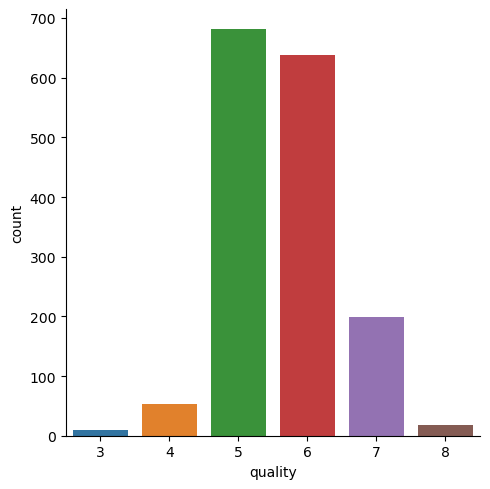

In [10]:
# find the count for each quality
# create a count plot using sns to visualize the distribution of data in "quality" variable
sns.catplot(x='quality',data=wine,kind='count')

# From the above graph we can find-
* There are 6 values
* If the wine quality is bad ,the value of quality is low (3,4)
* If the wine quality is good ,the value of quality is low (7,8)
* There is more amount of data with the quality value of 5 and 6

<Axes: xlabel='quality', ylabel='volatile acidity'>

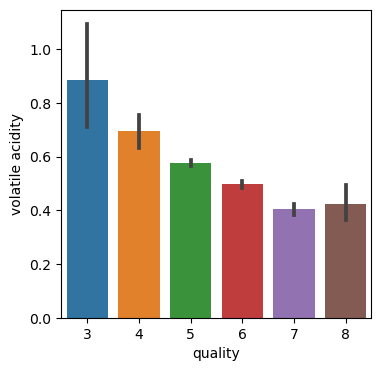

In [14]:
# Now we find how each attribute affects the quality-Which col is more related to label(quality)
# volatile acidity vs Quality
plot=plt.figure(figsize=(4,4)) # size of the plot
sns.barplot(x='quality',y='volatile acidity',data=wine)

* We can observe that when the volatile acidity is high, the quality of wine is less.
* Therefore, we can conclude that volatile acidity is inversely proportional to quality of wine.

<Axes: xlabel='quality', ylabel='citric acid'>

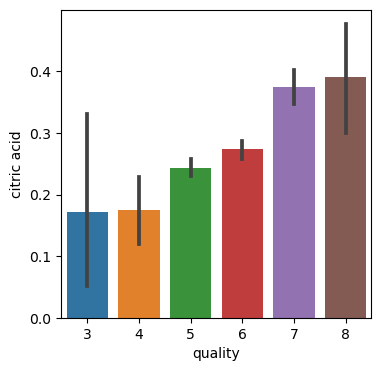

In [16]:
# citric acid vs Quality
plot=plt.figure(figsize=(4,4)) # size of the plot
sns.barplot(x='quality',y='citric acid',data=wine)

* We can observe that when the citric acid is high, the quality of wine is high.
* Therefore, we can conclude that citric acid is directly proportional to quality of wine.

<Axes: xlabel='quality', ylabel='sulphates'>

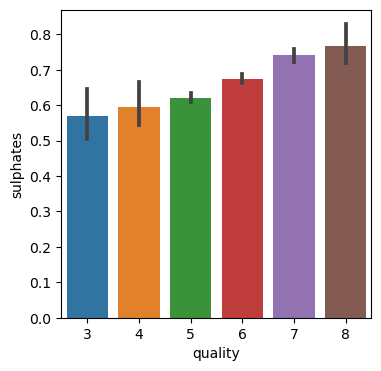

In [17]:
# sulphates vs Quality
plot=plt.figure(figsize=(4,4)) # size of the plot
sns.barplot(x='quality',y='sulphates',data=wine)

* We can conclude sulphates are directly proportional to quality.

# Correlation
* Positive Correlation-Directly prop
* Negative Correlation-Inversely prop

In [19]:
correlation=wine.corr()

<Axes: >

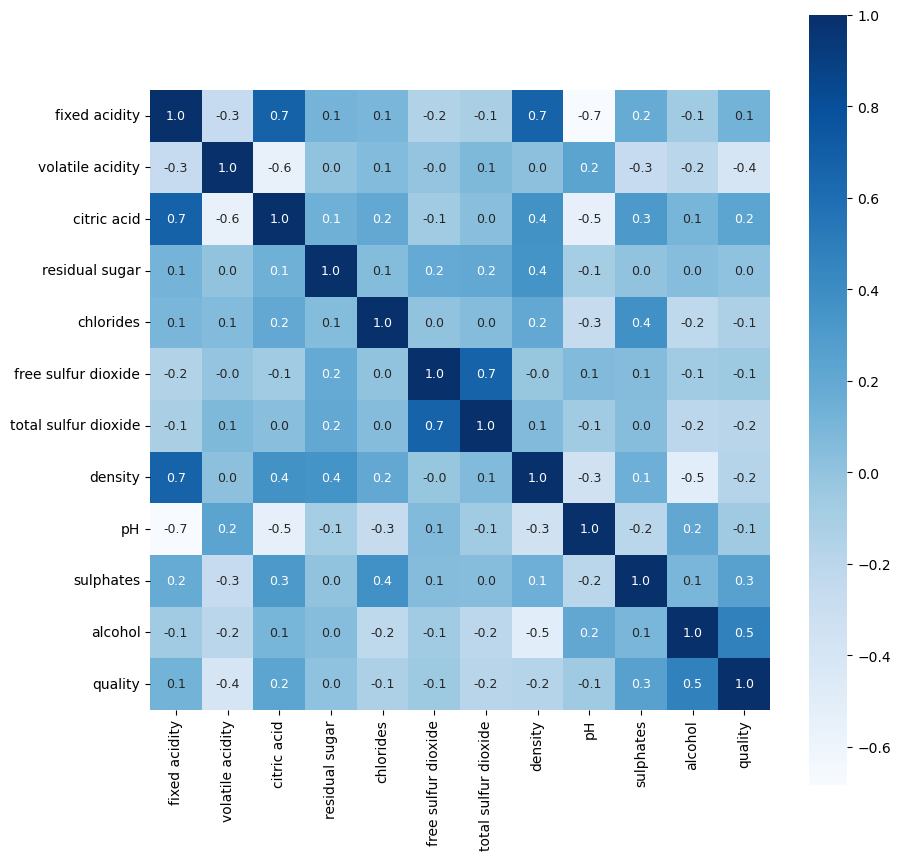

In [20]:
# Construction of heatmap to compare the correlation of the col
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':9},cmap='Blues')

* We can infer the following-
* The darkest colour(1.0) implies that the two values are close to each other i.e directly proportional
* The light colour(-0.6) implies the two values are inversely proportional to each other.
* Ignore the diagonal as its comparing with itself. 
* With respect to quality we can conclude that alcohol (with 0.5) is in positive correlation with quality and volatile acidity (with -0.4) is in negative correlation with quality.

<Axes: xlabel='quality', ylabel='alcohol'>

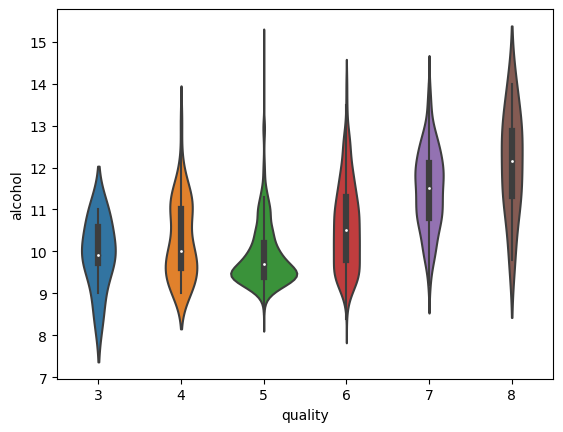

In [22]:
sns.violinplot(x='quality', y='alcohol', data=wine)

# Data Preprocessing

In [23]:
X=wine.drop('quality',axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [27]:
Y=wine['quality']
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [28]:
# Train and Test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3 )

# Linear Regression

In [32]:
reg=LinearRegression()
reg.fit(X_train,Y_train) #fitting the model to the provided data i.e learn the relaationships between the independent var in x_train and target var in y_train

LinearRegression()

In [33]:
reg.intercept_ # baseline prediction as in when all the independent variables=0,value of target var is 37

21.239236600231017

In [34]:
reg.coef_ # positive coefficients imply positive correlation with target variable
          # negative coefficients -negative correlation 

array([ 3.36851242e-02, -9.92226662e-01, -1.87235501e-01,  1.97378966e-02,
       -1.56830138e+00,  2.79715778e-03, -3.08990501e-03, -1.75080251e+01,
       -4.00620730e-01,  8.88221365e-01,  2.93405015e-01])

In [35]:
train_pred=reg.predict(X_train) # calculate the predicted values of target variable based on the learned coefficients and intercept
train_pred

array([5.7688486 , 6.21423613, 5.74677488, ..., 6.50602786, 5.72097597,
       5.54379749])

In [36]:
test_pred=reg.predict(X_test) # make predictions on the test data using TRAINED linear regression model
test_pred

array([5.10653854, 5.91510873, 5.28032277, 5.23641945, 6.55776119,
       5.03988515, 5.33319534, 5.69492845, 5.69466029, 5.94589082,
       5.91690607, 5.25611564, 6.64740735, 4.71065795, 6.07569152,
       5.46969256, 5.79235967, 5.70028674, 5.35085436, 5.00058777,
       6.17637242, 5.98932699, 5.43746534, 4.90858946, 4.72893209,
       5.08786356, 5.01409753, 6.21429303, 5.53628783, 5.13383548,
       5.79354844, 5.012961  , 5.85738139, 5.28102896, 5.18741135,
       5.27764784, 6.10672914, 5.68310501, 6.10813143, 6.58958152,
       5.60894546, 6.06475593, 5.68959177, 5.20694804, 5.13913997,
       5.83134526, 5.64355648, 5.7194812 , 5.09938499, 5.4097918 ,
       5.618413  , 5.76348988, 5.38432572, 5.7797578 , 5.71342576,
       6.49493653, 5.73803851, 5.04192999, 6.33100582, 5.56864428,
       5.60031477, 4.92698471, 5.32521839, 5.28164224, 5.92062624,
       6.53558797, 6.23161862, 5.38227485, 5.15836385, 5.60894546,
       6.51355826, 5.46393896, 5.20053764, 5.63765573, 5.27308

In [37]:
# To calculate the avg differences between the actual value and predicted vale of target variable
train_rmse=metrics.mean_squared_error(train_pred,Y_train)**0.5
train_rmse
# This code tells how well the model performs on the same data it was trained on
#Low value of RMSE indicates the model fits fine with the data and our model's predictions are off by aprrox 0.3

0.6286685535282377

In [38]:
# This code measures how the model responds to new,unseen data that it wasnt exposed to during training
test_rmse=metrics.mean_squared_error(test_pred,Y_test)**0.5
test_rmse
# We are getting relatively accurate predictions-closer to true data

0.6860305800287303

In [39]:
predicted_data=np.round_(test_pred)
predicted_data

array([5., 6., 5., 5., 7., 5., 5., 6., 6., 6., 6., 5., 7., 5., 6., 5., 6.,
       6., 5., 5., 6., 6., 5., 5., 5., 5., 5., 6., 6., 5., 6., 5., 6., 5.,
       5., 5., 6., 6., 6., 7., 6., 6., 6., 5., 5., 6., 6., 6., 5., 5., 6.,
       6., 5., 6., 6., 6., 6., 5., 6., 6., 6., 5., 5., 5., 6., 7., 6., 5.,
       5., 6., 7., 5., 5., 6., 5., 5., 6., 5., 5., 5., 5., 5., 5., 5., 6.,
       5., 5., 5., 6., 5., 5., 6., 5., 5., 6., 6., 6., 5., 5., 6., 5., 6.,
       5., 6., 5., 5., 6., 6., 6., 6., 6., 5., 5., 5., 6., 5., 5., 5., 5.,
       6., 6., 6., 5., 6., 6., 6., 5., 5., 5., 7., 7., 6., 6., 5., 6., 5.,
       6., 5., 5., 6., 5., 6., 6., 7., 5., 5., 5., 6., 5., 6., 5., 5., 5.,
       6., 6., 7., 5., 6., 5., 6., 6., 6., 6., 6., 6., 6., 6., 5., 4., 7.,
       5., 7., 6., 6., 6., 6., 6., 6., 6., 5., 5., 7., 5., 5., 5., 6., 5.,
       7., 6., 6., 6., 6., 5., 5., 5., 6., 5., 6., 5., 6., 6., 7., 5., 6.,
       6., 5., 5., 6., 6., 6., 5., 6., 5., 6., 5., 6., 5., 6., 5., 5., 5.,
       5., 6., 6., 5., 6.

# 3 Metrics are used to tell us how well the model is doing in making predictions-
* MAE- Measures the average absolute difference between the actual (true) values (Y_test) and the predicted values (test_pred). In simpler terms, it tells you, on average, how far off your predictions are from the real values. A smaller MAE means that your model's predictions are closer to the actual values.
* MSE- Measures the average of the squared differences between the actual values and the predicted values. It penalizes larger errors more than smaller ones. A smaller MSE indicates that, on average, your model's predictions have smaller errors.
* RMSE- It is essentially the square root of the MSE. It's a way to convert the error metric back to the original unit of measurement

In [40]:
print('Mean Absolute Error(MAE):',metrics.mean_absolute_error(Y_test,test_pred))
print('Mean Squared Error(MSE)',metrics.mean_squared_error(Y_test,test_pred))
rmse=np.sqrt(metrics.mean_squared_error(Y_test,test_pred))
print('Root Mean Error(RMSE)',rmse)

Mean Absolute Error(MAE): 0.5339369001542451
Mean Squared Error(MSE) 0.47063795673455616
Root Mean Error(RMSE) 0.6860305800287303


In [41]:
from sklearn.metrics import r2_score
r2_score(Y_test,test_pred)

0.3348811868194286

In [42]:
coefficients=pd.DataFrame(reg.coef_,X.columns)
coefficients.columns=['Coefficient']
coefficients

,Coefficient
fixed acidity,0.033685
volatile acidity,-0.992227
citric acid,-0.187236
residual sugar,0.019738
chlorides,-1.568301
free sulfur dioxide,0.002797
total sulfur dioxide,-0.003090
density,-17.508025
pH,-0.400621
sulphates,0.888221


## CONCLUSION: The above coefficients denote the impact of each on the Quality of Wine.

Such as,

* Every Alcohol measure increase will lead to increase of 0.3 in Quality.
* Increase in Chlorides will decrease the quality of Wine.